In [61]:
%matplotlib inline

import os

import numpy as np

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

### How the magnitude of $k$ and $\omega$ are related to cooling rate

### In general it is not possible to tune the model such that *both* the cooling rate and flux are good

### g-intervals with large k do not have a significant contribution to the overall fluxes

g-intervals for large `k` tend to have fewer spectral points.  This means that their k-distribution function (or `dg`) is small.  As a result, the fraction of total flux that their spectral points contribute to is small.  Therefore, these g-intervals do not contribute significantly to the total flux.

### In the k-distribution method, we essentially make the atmosphere grey, hence always understimating the effective absorption.

Take for example the simple situation where a beam of flux is absorbed as it goes through several atmosphere layers.  

The line-by-line method considers the absorption at *every* spectral point before adding them together:

$$
\sum_{\nu}^{\Delta\nu} F(\nu) e^{-\sum_{p} \tau(\nu, p)}
$$

whilst the k-distribution method averages the optical depth and the incoming flux over the spectral points before combining them:

$$
\left( \frac{1}{\Delta\nu} \sum_{\nu}^{\Delta\nu} F(\nu) \right) e^{-\sum_{p} \frac{1}{\Delta\nu} \sum_{\nu}^{\Delta\nu} \tau(\nu, p)}
$$

Below it is demonstrated that the k-distribution method would always tend to underestimate the absorption and so the out-going flux is always larger than that computed by the line-by-line method.

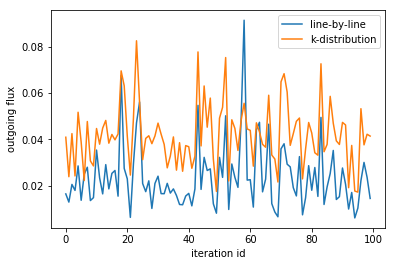

In [66]:
def lbl(influx, tau):
    '''
    Computes the flux that comes out of atmosphere layers,
    using line-by-line method.
    
    Parameters
    ----------
    influx: array-like [number of spectral points]
        Flux going into the atmosphere layers.
    tau: array-like [number of spectral points, number of layers]
        Optical depth of atmosphere layers.
    '''
    return np.sum(influx * np.exp(- tau.sum(axis=1)))


def kdist(influx, tau):
    '''
    Computes the flux that comes out of atmosphere layers,
    using k-distribution method.
    
    Parameters
    ----------
    influx: array-like [number of spectral points]
        Flux going into the atmosphere layers.
    tau: array-like [number of spectral points, number of layers]
        Optical depth of atmosphere layers.    
    '''
    mean_tau = tau.mean(axis=1)
    mean_influx = influx.mean()
    return mean_influx * np.exp(- mean_tau.sum())


n_iters = 100
nv = 5
nlayer = 10

outflux_lbl = []
outflux_kdist = []

for _ in range(n_iters):
    tau = np.random.rand(nv, nlayer)
    influx = np.random.rand(nv)
    
    outflux_lbl.append(lbl(influx, tau))
    outflux_kdist.append(kdist(influx, tau))
    
outflux_lbl = np.array(outflux_lbl)
outflux_kdist = np.array(outflux_kdist)

plt.plot(outflux_lbl, label='line-by-line')
plt.plot(outflux_kdist, label='k-distribution')
plt.legend()
plt.xlabel('iteration id')
plt.ylabel('outgoing flux')

### Transmittance over all angles approximated

The transmittance at a single angle is

$$
exp(-\tau/\mu)  \quad .
$$

Integrated over all the angles, it is

$$
\text{tku} = 2 \int_{0}^{1} \: d\mu \: \mu \: exp(-\tau/\mu) \quad.
$$


